<html>
    <div dir = "rtl" style="font-size: 26px; color: blue">
        <b>
            پروژه سوم درس هوش مصنوعی
            <br>
            <br>
            Naive Bayes Classifier
        </b>
    </div>
<br>
<br>
<br>
    <div dir = "rtl" style="font-size: 24px; color: gray">
        <b>
            معین کرمی
            <br>
            <br>
            810198540
        </b>
    </div>
</html>


<html>
    <div dir = "rtl" style="font-size: 22px; color: green">
        <b>
            هدف پروژه:
        </b>
    </div>
    <div dir = "rtl" style = "font-size: 16px">
        <b>
            <br>
             هدف از این پروژه آشنایی با
            Naive Bayes Classifier
            و استفاده از آن برای طبقه بندی اطلاعات است.
        <br>
        <br>
    </div>
    <div dir = "rtl" style="font-size: 22px; color: green">
        <b>
            خلاصه ی مسئله:
        </b>
    </div>
    <br>
    <div dir = "rtl" style = "font-size: 16px">
            در این مسئله یک مجموعه مقالات که هر کدام موضوع خاصی دارند به ما داده‌شده است و ما باید با استفاده از 
        Naive Bayes Classifier
        این مقالات را تجزیه تحلیل کنیم و یک مدل برای تشخیص موضوع مقالات ارائه دهیم.
    </div>
</html>


<html>
    <div dir = "rtl" style="font-size: 22px; color: green">
        <b>
            فاز اول: پیش‌پردازش داده
        </b>
    </div>
    <div dir = "rtl" style = "font-size: 16px">
        <br>
        ۱.
       در متن ها به دلایل مختلف از اشکال مختلف یک کلمه مانند
        organize, organizes, organizing
        استفاده می‌شود. علاوه بر این از کلمات هم خوانواده و یا کلماتی که معنای مشابه دارند مانند
        democracy, democratic, democratization
        استفاده می‌شود.
         <br>
        هدف 
        stemming, lemmatization
        بی‌اثر کردن تفاوت این کلمات است به صورتی که یک کلمه در نظر گرفته شوند.
        <br>
        در 
        stemming
        کلمات را با ریشه آن ها جایگزین می‌کنیم مثلا:
        fished -> fish.
        <br>
         در 
        lemmatisation
        کلمات مشابه مانند کلمات هم‌خانواده و هم معنی را در یک گروه قرار می‌دهیم و یک کلمه در نظر می‌گیریم.
        مثلا:
        better, good
        <br>
    </div>
</html>

In [1]:
import pandas as pd
import numpy as np
from __future__ import unicode_literals
from hazm import *

<html>
    <div dir = "rtl" style = "font-size: 16px">
        <br>
        در اینجا ابتدا متن را نرمالایز می‌کنیم (نیم فاصله ها را به متن اضافه می‌کنیم).
        سپس کلمات متن را جدا می‌کنیم و ایست‌واژه‌ها، اعداد و کلمات پرتکرار بی‌اهمیت که در فایل
        ignore.txt
        آمده‌اند را از آن حذف می‌کنیم و در نهایت کلمات را
        lemmatize
        می‌کنیم.
        <br>
        از 
        stem
        استفاده نمی‌کنیم چون این متد بعضی کلمه‌ها مخصوصا فعل ها را خراب می‌کند به مثال توجه کنید.
        <br>
    </div>
</html>

In [2]:
stemmer = Stemmer()
print(stemmer.stem('رفتم'))

رف


In [3]:
class Bayes:
    def __init__(self): 
        self.normalizer = Normalizer()
        self.lemmatizer = Lemmatizer()
        self.stop_words = open("ignore.txt").read().split()
        
    def preprocess_text(self, text):
        text = ''.join([i for i in text if not i.isdigit()]) #delete numbers
        text = self.normalizer.normalize(text) #using semi space
        tokens = word_tokenize(text)
        chosen_tokens = []
        for token in tokens:
            if token not in self.stop_words:
                chosen_tokens.append(self.lemmatizer.lemmatize(token).split('#')[0])
        return chosen_tokens

<html>
    <div dir = "rtl" style="font-size: 22px; color: green">
        <b>
            فاز دوم: فرآیند مسئله
        </b>
    </div>
    <div dir = "rtl" style = "font-size: 16px">
        <br>
        ۲.
        $$ P(c|x) = \frac{P(x|c)P(c)}{P(x)} $$
        <br>
        x: مجموعه مرتب کلمات دیده شده.
        <br>
        c: موضوع مقاله
        <br>
        <br>
        $P(c | x)$ : (Posterior Probability)
        احتمال اینکه موضوع خبر
        c
        باشد به شرط اینکه 
        x
        در آن دیده شود.
        <br>
        روش محاسبه:
        این احتمال با استفاده از سه متغیر دیگر محاسبه می‌شود.
        <br>
        <br>
        $P(x | c)$: (Likelihood)
        احتمال اینکه  
        x
        دیده شود، به شرط اینکه موضوع مقاله 
        c
        باشد.
        <br>
        روش محاسبه:
        به ازای هر مجموعه مرتب کلمات مانند
        y
        که در مقاله‌هایی با موضوع 
        c
        آمده، محاسبه می‌کنیم که 
        y
        چند بار در این مقاله ها تکرار شده
        و این مقدار را برابر با 
        f(y)
        قرار می‌دهیم.
        سپس جمع تمام 
        f(y)
        ها را به ازای هر 
        y
        برابر
        s(c)
        در نظر می‌گیریم و در نهایت داریم:
        $$P(x | c) = \frac{f(x)}{s(c)}$$ : 
        <br>
        $P(c)$: (Class Prior Probablity)
        احتمال اینکه موضوع مقاله با توجه به مشاهداتی که تا الان انجام شده است، 
        c
        باشد.
        <br>
        روش محاسبه:
        این مقدار به مرور زمان عوض میشود و در هر مرحله برابر 
        $P(x | c)$
        می‌شود ولی در 
        ابتدا محاسبه می‌کنیم که چند مقاله با موضوع 
        c
        داریم و این مقدار را
        r(c)
        می‌نامیم.
        تعداد کل مقالات را نیز 
        n
        می‌نامیم. و در نهایت داریم:
        $$P(c) = \frac{r(c)}{n}$$
        حال در اینجا چون از تمام موضوع ها به یک اندازه مقاله داریم،
        P(c)
        به ازای تمام موضوعات برابر 
        0.25
        است.
        <br>
        <br>
        $P(x)$: (Predictor Prior Probablity)
        احتمال اینکه 
        x
        دیده شود.
        <br>
        روش محاسبه:
        ابتدا به ازای هر مجموعه کلمات مانند 
        y
        به دست می‌آوریم که در تمام مقالات چند بار تکرار شده اند و سپس این مقدار را 
        g(y)
        می‌نامیم. سپس جمع تمام 
        g(y)
        ها به ازای هر 
        y
        را 
        t
        می‌نامیم و در نهایت داریم:
        $$P(x) = \frac{g(x)}{t}$$
        <br>
        <br>
        توجه کنید در اینجا 
        x
        می‌تواند یک کلمه و یا مجموعه ای مرتب از کلمات باشند که پشت سر هم آمده‌اند مانند 
        (bigrams).
    </div>
</html>

In [4]:
def fix_titles(self, data):
    self.titles = dict()
    self.papers = len(data)
    for index, row in data.iterrows():
        if row.isnull().values.any():
            continue

        if row[1] in self.titles:
            self.titles[row[1]] += 1
        else :
            self.titles[row[1]] = 1

def fix_words(self, data):
    self.words = dict()
    self.total_words = 0
    
    self.words_in_title = dict()
    self.total_words_in_title = dict()
    self.distinct_words = 0
    seen_word = dict()
    for key, value in self.titles.items():
        self.words_in_title[key] = dict()
        self.total_words_in_title[key] = 0
        
    for index, row in data.iterrows():
        if row.isnull().values.any():
            continue
        title = row[1]
        tokens = self.preprocess_text(row[0])
        for token in tokens:
            self.total_words_in_title[title] += 1
            self.total_words += 1

            if token not in seen_word:
                self.distinct_words += 1
                seen_word[token] = True
            
            if token in self.words:
                self.words[token] += 1
            else:
                self.words[token] = 1

            if token in self.words_in_title[title]:
                self.words_in_title[title][token] += 1
            else:
                self.words_in_title[title][token] = 1
                

def train(self, data):
    self.fix_titles(data)
    self.fix_words(data)

Bayes.fix_titles = fix_titles
Bayes.fix_words = fix_words
Bayes.train = train

<html>
    <div dir = "rtl" style="font-size: 20px; color: blue">
        <b>
            Bigrams
        </b>
    </div>
    <div dir = "rtl" style = "font-size: 16px">
        <br>
        ۳.
        شیر وحشی است.
        <br>
        شیر مقوی است.
        <br>
        در این دو مثال کلمه ای که بعد از ((شیر)) آمده معنای ((شیر)) را مشخص می‌کند. یعنی در جمله اول با توجه به ((وحشی)) می‌فهمیم منظور از ((شیر))، شیر جنگل است و در جمله ی دوم با توجه به ((مقوی)) می‌فهمیم منظور از ((شیر))، شیر خوراکی است.
        <br>
        bigram
        در مثال ما برای مشخص کردن معنای کلمه در مثال ما کافی است و نیاز به 
        n-gram
        طولانی تر نداریم.
        <br><br>
        در این پروژه تنها از 
        unigram
        استفاده می‌کنیم و به بافت متن توجهی نداریم.
    </div>
</html>

<html>
    <div dir = "rtl" style="font-size: 20px; color: blue">
        <b>
            Additive Smoothing
        </b>
    </div>
    <div dir = "rtl" style = "font-size: 16px">
        <br>
        ۴.
        با توجه به فرمول
        $$ P(c|x) = \frac{P(x|c)P(c)}{P(x)} $$
        در صورتی که 
        x
        در 
        c
        دیده نشود
        $P(x | c)$
        برابر 0 می‌شود و در نتیجه
        $P(c|x)$
        نیز برابر 0 می‌شود. پس مدل با قطعیت تشخیص می‌دهد که موضوع مورد نظر 
        c
        نیست.
        <br>
        پس اگر 
        x
        فقط در یک موضوع خاص مانند 
        j
        وجود داشته باشد، مدل با قاطعیت تشخیص می‌دهد هر مقاله ای که در آن کلمه 
        x
        آمده، موضوعش 
        j
        است چون 
        $p(c | x)$
        به ازای تمام موضوعات دیگر برابر 0 است.
    </div>
</html>

<html>
    <div dir = "rtl" style = "font-size: 16px">
        <br>
        5.
        این روش روی محاسبه
        $P(x|c)$
        تاثیر می‌گذارد، به صورتی که به جای محاسیه
        $\frac{f(x)}{s(c)}$
        عبارت
        $\frac{f(x) + \alpha}{s(c) + unique\_words}$
        را محاسبه می‌کنیم که 
        $\alpha$
        یک عدد ثابت صحیح و مثبت و 
        $unique\_words$
        تعداد کلمات متفاوتی است که در مقالات 
        آمده‌اند.
        (
        $s(c)$
        برابر تعداد کل کلماتی است که در مقاله های با موضوع 
        c
        آمده)
        <br>
        با این کار اگر
        x
        در مقالات با موضوع 
        c
        نیامده باشند 
        $P(x | c)$
        دیگر برابر 0 نمی‌شود و در نتیجه 
        $P(c | x)$
        نیز 0 نمی‌شود و مدل ما با قاطعیت رد نمی‌کند که موضوع مقاله مورد نظر 
        c
        نباشد.
    </div>
</html>

<html>
    <div dir = "rtl" style="font-size: 20px; color: blue">
        <b>
            بررسی صحت
        </b>
    </div>
    <div dir = "rtl" style = "font-size: 16px">
        <br>
    </div>
</html>

In [5]:
bayes = Bayes()
data = pd.read_csv('train.csv')
bayes.train(data)

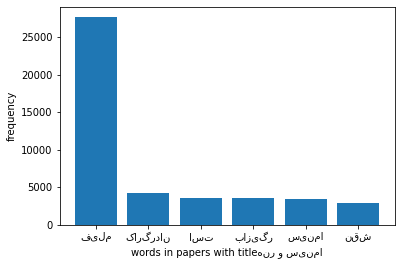

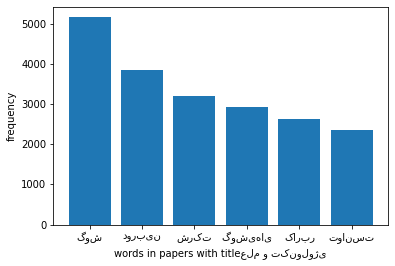

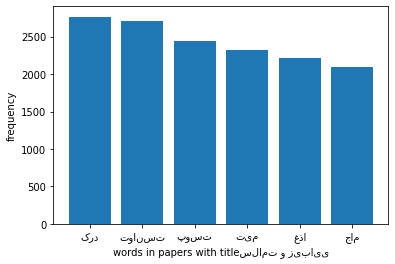

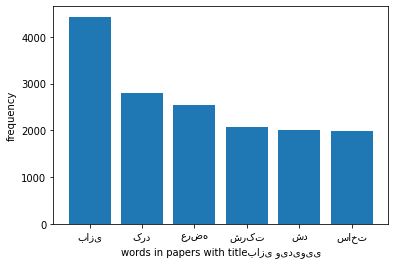

In [6]:
from matplotlib import pyplot as plt
from operator import itemgetter

def draw_plot(self, title):
    result = dict(sorted(bayes.words_in_title[title].items(), key=itemgetter(1), reverse=True)[:6])
    plt.bar(result.keys(), result.values())
    plt.xlabel(f'words in papers with title{title}')
    plt.ylabel('frequency')
    plt.show()
Bayes.draw_plot = draw_plot


for title, value in bayes.titles.items():
    bayes.draw_plot(title)

<html>
    <div dir = "rtl" style="font-size: 22px; color: green">
        <b>
            فاز سوم: ارزیابی
        </b>
    </div>
    <div dir = "rtl" style = "font-size: 16px">
        <br>
         برای سادگی بیشتر به جای ضرب عبارات، لگاریتم آن ها را جمع می‌کنیم.
    </div>
</html>

In [7]:
def calculate_probs(self, text, alpha):
    tokens = self.preprocess_text(text);
    probs = dict()
    for title, value in self.titles.items():
        probs[title] = np.log(value / self.papers)

    for token in tokens:
        for title, value in self.titles.items():
            if token not in self.words_in_title[title]:
                self.words_in_title[title][token] = 0
            
            probs[title] += np.log((self.words_in_title[title][token] + alpha ) / (self.total_words_in_title[title] + ((alpha != 0) * self.distinct_words)))
    return probs
            
def predict_title(self, text, alpha):
    probs = self.calculate_probs(text, alpha)
    title = 'سلامت و زیبایی'
    max_prob = -float('inf')
    for key, value in probs.items():
        if value > max_prob:
            title = key
            max_prob = value
    return title

Bayes.calculate_probs = calculate_probs
Bayes.predict_title = predict_title

<html>
    <div dir = "rtl" style="font-size: 22px; color: green">
        <b>
        </b>
    </div>
    <div dir = "rtl" style = "font-size: 16px">
        ۷.
         Precision:
        در این معیار ما توجهی به تعداد مقاله‌هایی که این موضوع را داشته‌اند ولی موضوعشان اشتباه تشخیص داده شده است نداریم. مثلا فرض کنید ۱۰۰ مقاله علمی داریم و تنها یکی از این ۱۰۰ مقاله را علمی تشخیص دادیم و در کل هیج مقاله ی دیگری را علمی تشخیص نداده ایم، در این حالت مشخص است که ما دقت کمی داریم ولی این معیار برابر ۱ است که خیلی زیاد است.
        <br>
        به بیان دیگر به 
        false negative 
        ها اهمیت نمی‌دهیم.
        <br>
       Recall:
        مشکل این معیار دقیقا برعکس معیار قبلی است، در این معیار ما توجهی به مقاله‌هایی که این موضوع را نداشته اند و به اشتباه تشخیص داده ایم که این موضوع را دارند نمی‌شود. مثلا فرض کنید تشخیص دهیم موضوع تمام مقالات علمی است، واضح است که تشخیص ما دقت خیلی کمی دارد ولی مقدار این معیار برای این تشخیص 1 میشود که مقدار خیلی زیادی است.
        <br>
        به عبارت دیگر توجهی به 
        false positive
        نداریم.
        <br><br>
        ۸.
        این معیار از 
        harmonic mean
         دو معیار بالا استفاده می‌کند و در نتیجه بر خلاف دو معیار بالا هم 
        به
        false negative 
        و هم به 
         false positive
        توجه می‌کند.
        <br>
        فهم این معیار کمی از 
        Accuracy
        سخت تر است ولی استفاده ی بیشتری دارد.
        به عبارت دیگر 
        Accuracy
         زمانی بهتر کار می‌کند که 
        false positive
         و
        false negative
        برای ما هزینه ی یکسانی داشته باشند، اگر هزینه این دو برای ما تفاوت زیادی داشته باشد، استفاده از 
        F۱ score
        بهتر راست و برای همین این نوع میانگین گیری در اینجا اهمیت زیادی دارد.
        <br>
    </div>
</html>

<html>
    <div dir = "rtl" style="font-size: 22px; color: green">
        <b>
        </b>
    </div>
    <div dir = "rtl" style = "font-size: 16px">
        ۹.
        macro:
        در این روش از معیار 
        F1-score
        در تمام کلاس ها میانگین می‌گیریم. به این معیار
        macro-average F1-score
        یه با اختصار
        macro-F1
        نیز گفته می‌شود.
        <br>
        به طور مشابه
        macro-averaged F1-score
        و یا به اختصار
        macro-averaged
        تعریف می‌شود که در آن به جای معیار 
        F1
        برای کل کلاس ها از 
        Presicion 
        آن ها میانگین گیری می‌کنیم.
        <br><br>
        weightd:
        در معیار بالا ما برای میانگین گیری وزن یکسانی به 
        F1-score
        تمام موضوعات می‌دهیم، اما در 
        weighted-average F1-score
        یا به اختصار
        weightd-F1
        به 
        F1-score
        هر موضوع متناسب با تعداد دیتای موجود از هر موضوع وزن  می‌دهیم و سپس میانگین گیری وزن دار انجام می‌دهیم.
        <br>
        به طور مشابه معیار های
        Weighted-precision
        و
        Weighted-recall
        نیز تعریف می‌شوند.
        <br><br>
        micro:
        این معیار در اصل برابر همان
        Accuracy
        است. به بیان دیگر در اینجا داریم:
        <br><br>
        $$micro-F1 = \frac{True Positives}{All\_test\_cases}$$
        <br>
    </div>
</html>

<html>
    <div dir = "rtl" style="font-size: 22px; color: green">
        <b>
            تشخیص موضوع مقالات 
            test data set
        </b>
    </div>
        <div dir = "rtl" style = "font-size: 16px">
        <br>
         توجه کنید در اینجا اگر هنگام فراخوانی تابع 
            $predict\_title$
            مقدار 
            $\alpha$
            برابر 0 باشد، مدل ما از روش
            smoothing
            استفاده نمی‌کند و در غیر این صورت، از این روش استفاده می‌کند.
    </div>
</html>

In [8]:
test = pd.read_csv("test.csv")
predicted_titles_without_smoothing = []
predicted_titles_with_smoothing = []

for index, row in test.iterrows():
    if row.isnull().values.any():
            continue
    predicted_titles_without_smoothing.append(bayes.predict_title(row[0], 0))
    predicted_titles_with_smoothing.append(bayes.predict_title(row[0], 1))
test['predicted titles without smoothing'] = predicted_titles_without_smoothing
test['predicted titles with smoothing'] = predicted_titles_with_smoothing

<ipython-input-7-d85f664028fe>:12: RuntimeWarning: divide by zero encountered in log
  probs[title] += np.log((self.words_in_title[title][token] + alpha ) / (self.total_words_in_title[title] + ((alpha != 0) * self.distinct_words)))


<html>
        <div dir = "rtl" style = "font-size: 16px">
        <br>
         ۱۰.
    </div>
</html>

In [9]:
def calculate_accuracy(self, true_values, predicted_values):
    true_gues= 0;
    for i, j in zip(true_values, predicted_values):
        true_gues += int(i == j)
    return true_gues / len(true_values)
Bayes.calculate_accuracy = calculate_accuracy

def calculate_precision(self, true_values, predicted_values, label):
    correct_gues = 0
    all_gues = 0
    for i, j in zip(true_values, predicted_values):
        if j == label:
            all_gues += 1
            if i == j:
                correct_gues += 1
    return correct_gues / all_gues
Bayes.calculate_precision = calculate_precision

def calculate_recall(self, true_values, predicted_values, label):
    correct_gues = 0
    in_label = 0
    for i, j in zip(true_values, predicted_values):
        if i == label:
            in_label += 1
            if i == j:
                correct_gues += 1
    return correct_gues / in_label
Bayes.calculate_recall = calculate_recall

def calculate_f1(self, true_values, predicted_values, label):
    recall = self.calculate_recall(true_values, predicted_values, label)
    precision = self.calculate_precision(true_values, predicted_values, label)
    if (recall + precision == 0):
        return 0
    return 2 * (recall * precision) / (recall + precision)
Bayes.calculate_f1 = calculate_f1

def calculate_macro(self, true_values, predicted_values):
    f1 = []
    for label, value in self.titles.items():
        f1.append(self.calculate_f1(true_values, predicted_values, label))
    return sum(f1) / len(f1)
Bayes.calculate_macro = calculate_macro

def calculate_weighted(self, true_value, predicted_values):
    weights = dict()
    f1 = dict()
    
    for label, value in self.titles.items():
        weights[label] = 0
        f1[label] = (self.calculate_f1(true_values, predicted_values, label))
    for label in true_value:
        weights[label] += 1
        
    res = 0
    for label, value in f1.items():
        res += value * weights[label]
    return res / sum(weights.values())
Bayes.calculate_weighted = calculate_weighted

<html>
        <div dir = "rtl" style = "font-size: 16px">
        <br>
         ۱۰.
            الف)
    </div>
</html>

In [10]:
from sklearn.metrics import classification_report

result = []
names = [['', 'Science Technology', 'Art Cinema', 'Video Games', 'Health Beauty', 'All Classes']];

true_values = test.loc[:, 'label']

titles = []
titles.append('علم و تکنولوژی')
titles.append('هنر و سینما')
titles.append('بازی ویدیویی')
titles.append('سلامت و زیبایی')

precision = ['Precision']
for title in titles:
    precision.append(bayes.calculate_precision(true_values, predicted_titles_without_smoothing, title))
precision.append(None)
result.append(precision)

recall = ['Recall']
for title in titles:
    recall.append(bayes.calculate_recall(true_values, predicted_titles_without_smoothing, title))
recall.append(None)
result.append(recall)

f1 = ['F1-score']
for title in titles:
    f1.append(bayes.calculate_f1(true_values, predicted_titles_without_smoothing, title))
f1.append(None)
result.append(f1)

accuracy = ['Accuracy', None, None, None, None, bayes.calculate_accuracy(true_values, predicted_titles_without_smoothing)]
result.append(accuracy)

macro = ['Macro Avg', None, None, None, None, bayes.calculate_macro(true_values, predicted_titles_without_smoothing)]
result.append(macro)

micro = ['Micro Avg', None, None, None, None, bayes.calculate_accuracy(true_values, predicted_titles_without_smoothing)]
result.append(micro)

weighted = ['Weighted Avg', None, None, None, None, bayes.calculate_weighted(true_values, predicted_titles_without_smoothing)]
result.append(weighted)

pd.DataFrame(result, columns = names)

,,Science Technology,Art Cinema,Video Games,Health Beauty,All Classes
0,Precision,0.972222,0.833333,1.000000,0.221140,NaN
1,Recall,0.126354,0.089820,0.147208,0.987578,NaN
2,F1-score,0.223642,0.162162,0.256637,0.361364,NaN
3,Accuracy,NaN,NaN,NaN,NaN,0.296758
4,Macro Avg,NaN,NaN,NaN,NaN,0.250951
5,Micro Avg,NaN,NaN,NaN,NaN,0.296758
6,Weighted Avg,NaN,NaN,NaN,NaN,0.246592


In [11]:
cr = classification_report(y_true = true_values, y_pred=predicted_titles_without_smoothing, output_dict=True)
display(pd.DataFrame(data=cr).T)

,precision,recall,f1-score,support
بازی ویدیویی,1.000000,0.147208,0.256637,197.000000
سلامت و زیبایی,0.221140,0.987578,0.361364,161.000000
علم و تکنولوژی,0.972222,0.126354,0.223642,277.000000
هنر و سینما,0.833333,0.089820,0.162162,167.000000
accuracy,0.296758,0.296758,0.296758,0.296758
macro avg,0.756674,0.337740,0.250951,802.000000
weighted avg,0.799346,0.296758,0.246592,802.000000


<html>
        <div dir = "rtl" style = "font-size: 16px">
        <br>
         ۱۰.
            ب)
    </div>
</html>

In [12]:
result = []
names = [['', 'Science Technology', 'Art Cinema', 'Video Games', 'Health Beauty', 'All Classes']];

true_values = test.loc[:, 'label']

titles = []
titles.append('علم و تکنولوژی')
titles.append('هنر و سینما')
titles.append('بازی ویدیویی')
titles.append('سلامت و زیبایی')

precision = ['Precision']
for title in titles:
    precision.append(bayes.calculate_precision(true_values, predicted_titles_with_smoothing, title))
precision.append(None)
result.append(precision)

recall = ['Recall']
for title in titles:
    recall.append(bayes.calculate_recall(true_values, predicted_titles_with_smoothing, title))
recall.append(None)
result.append(recall)

f1 = ['F1-score']
for title in titles:
    f1.append(bayes.calculate_f1(true_values, predicted_titles_with_smoothing, title))
f1.append(None)
result.append(f1)

accuracy = ['Accuracy', None, None, None, None, bayes.calculate_accuracy(true_values, predicted_titles_with_smoothing)]
result.append(accuracy)

macro = ['Macro Avg', None, None, None, None, bayes.calculate_macro(true_values, predicted_titles_with_smoothing)]
result.append(macro)

micro = ['Micro Avg', None, None, None, None, bayes.calculate_accuracy(true_values, predicted_titles_with_smoothing)]
result.append(micro)

weighted = ['Weighted Avg', None, None, None, None, bayes.calculate_weighted(true_values, predicted_titles_with_smoothing)]
result.append(weighted)

pd.DataFrame(result, columns = names)

,,Science Technology,Art Cinema,Video Games,Health Beauty,All Classes
0,Precision,0.956989,0.953488,0.989362,0.944785,NaN
1,Recall,0.963899,0.982036,0.944162,0.956522,NaN
2,F1-score,0.960432,0.967552,0.966234,0.950617,NaN
3,Accuracy,NaN,NaN,NaN,NaN,0.961347
4,Macro Avg,NaN,NaN,NaN,NaN,0.961209
5,Micro Avg,NaN,NaN,NaN,NaN,0.961347
6,Weighted Avg,NaN,NaN,NaN,NaN,0.961369


In [13]:
cr = classification_report(y_true = true_values, y_pred=predicted_titles_with_smoothing, output_dict=True)
display(pd.DataFrame(data=cr).T)

,precision,recall,f1-score,support
بازی ویدیویی,0.989362,0.944162,0.966234,197.000000
سلامت و زیبایی,0.944785,0.956522,0.950617,161.000000
علم و تکنولوژی,0.956989,0.963899,0.960432,277.000000
هنر و سینما,0.953488,0.982036,0.967552,167.000000
accuracy,0.961347,0.961347,0.961347,0.961347
macro avg,0.961156,0.961655,0.961209,802.000000
weighted avg,0.961762,0.961347,0.961369,802.000000


<html>
        <div dir = "rtl" style = "font-size: 16px">
        <br>
         ۱۱.
            همان طور که مشاهده می‌کنید استفاده از
            Additive Smoothing
            به شدت دقت مدل ما را بالا می‌برد.
            <br>
            همچنین در حالتی که از این روش استفاده نکردیم 
            چون موضوع پیش فرض مقالات را ((سلامت و زیبایی)) فرض کرده ایم، این موضوع مقاله در معیار 
            recall
            امتیاز بالایی دارد
            چون در این معیار
            False Positive
            برای ما اهمیتی ندارد و این لیبل را به بسیاری از مقاله ها که کلمه جدید داشته اند، نسبت داده ایم. 
    </div>
</html>

In [14]:
count = 5
for index, row in test.iterrows():
    if row.isnull().values.any():
            continue
    if row[1] != row[3]:
        print('______________________')
        print(f'real title: {row[1]}')
        print(f'predicted title: {row[3]}')
        print(row[0])
        
        count -= 1
        if count == 0:
            break

______________________
real title: هنر و سینما
predicted title: علم و تکنولوژی
دیزنی به کمک دوربین‌های نوکیا، محتوای واقعیت مجازی می‌سازد نوکیا سال گذشته از یک دوربین واقعیت مجازی به اسم OZO VR رونمایی کرد. این دوربین با قیمت ۶۰ هزار دلاری‌اش، اصلا به درد فیلم‌بردارهای آماتور نمی‌خورد و برای استودیوهای فیلم‌سازی و فیلم‌برداران حرفه‌ای طراحی شده است. استودیوی فیلم‌سازی دیزنی هم اخیرا با نوکیا وارد همکاری جدیدی شده است. دیزنی می‌خواهد با دوربین واقعیت مجازی نوکیا، فیلم‌هایی مختص هدست‌های واقعیت مجازی بسازد. دیزنی گفته است که می‌خواهد از دوربین نوکیا برای ساخت تجربه‌های جدید واقعیت مجازی استفاده کند. دوربین OZO VR شرکت نوکیا قابلیت‌های قدرتمندی مثل توانایی پیش‌نمایش ویدیوهای ضبط شده دارد و می‌تواند به صورت بی‌سیم هم کار کند. این دوربین می‌تواند حتی صدا و تصویر ۳۶۰ درجه را به دیگر دستگاه‌ها بفرستد. دوربین OZO VR هشت سنسور تصویربرداری، میکروفون داخلی و قابلیت ضبط ویدیوهای سه‌بعدی را دارد. دیزنی گفته است که می‌خواهد از این دوربین نوکیا برای ساخت تجربه‌های جدید واقعیت مجازی استفاده کند. البته

<html>
        <div dir = "rtl" style = "font-size: 16px">
        <br>
         ۱۲.
            ما در مدل خود فقط به وجود کلمات بدون توجه به بافت متن دقت می‌کنیم و این باعث خطا می‌شود.
            <br>
            به عنوان مثال در نمونه دوم در بالا، درباره ی شرکت های بازی سازی و تکنولوژی آن ها صحبت شده و این موضوع این مقاله تکنولوژی است ولی چون فقط وجود کلمات برای ما مهم است و بیشتر کلمات این متن مانند 
            AMD, 
            گیمر،
            بازی و ...
            به بازی مربوط هستند و زیاد تکرار شده اند، مدل ما این مقاله را در دسته ی بازی ها دسته بندی می‌کند.
    </div>
</html>

<html>
    <div dir = "rtl" style="font-size: 22px; color: green">
        <b>
            نتیجه گیری:
        </b>
    </div>
    <br>
    <div dir = "rtl" style = "font-size: 16px">
            برای طبقه بندی داده ها روش های مختلفی وجود دارد که یکی از آن ها
        Naive Bayes Classifier
        است که از قانون بیزی استفاده می‌کند و دقت بالایی دارد.
        <br>
        البته این مدل مشکلاتی دارد که با روش هایی مانند
        Additive Smoothing
        به مقدار خوبی حل می‌شوند.
        <br>
        لازم به ذکر است که معیار و روش های متفاوتی برای اندازه گیری دقت یک مدل داریم که از آن ها می‌توان به
        f1-score, recall, ...
        اشاره کرد.
    </div>
    <div dir = "rtl" style="font-size: 22px; color: green">
        <b>
            <br><br>
            پیشنهادات:
        </b>
    </div>
    <br>
    <div dir = "rtl" style = "font-size: 16px">
            ندارم!
    </div>
</html>
